# Communicating Data Science Results Assignment
# San Francisco Crime Incidents for Summer 2014

### Create a class and function to process date

In [37]:
setClass("myDate")
setAs("character", "myDate", function(from) as.POSIXct(strptime(from, format="%m/%d/%Y")))

### Read the data into dataframe sfData

In [38]:
file = "sanfrancisco_incidents_summer_2014.csv"
sfData = read.csv(file, colClasses = c(
                "IncidntNum" = "factor",
				"Category" = "factor",
				"Descript" = "character",
				"DayOfWeek" = "factor",
                "Date" = "myDate",
				"Time" = "character",
				"PdDistrict" = "factor",
				"Resolution" = "factor",
				"Address" = "character",
				"X" = "numeric",
				"Y" = "numeric",
				"Location" = "character",
				"PdId" = "factor"
				)
			)

### Function to return the hour of day from the "Time" column entry

In [39]:
hourF = function(x) as.integer(strsplit(x, ":")[[1]][1])

### Create a new column in the sfData dataframe for the hour of the incident

In [40]:
sfData$hour = sapply(sfData$Time, hourF, USE.NAMES = FALSE)

# Get the frequency of incidents in each hour of the day and plot them

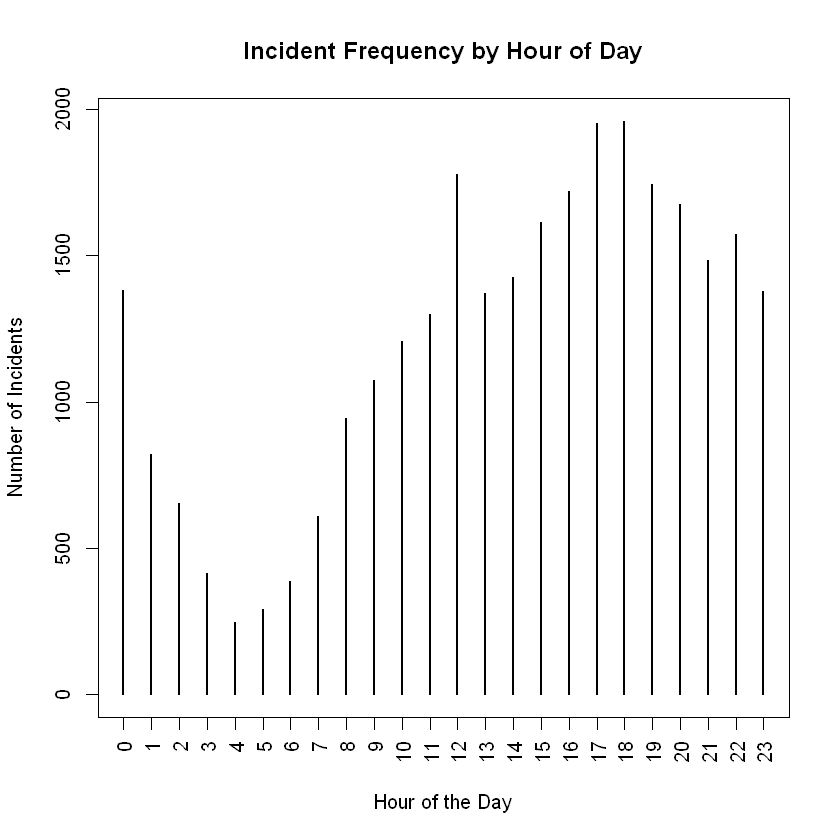

In [41]:
freqPerHourOfDay = table(sfData$hour)
plot(freqPerHourOfDay, las=3, xlab="Hour of the Day", ylab="Number of Incidents", main="Incident Frequency by Hour of Day")

The peak frequencies of incidents occur at noon and around dinner time.

### Reorder the factors for "DayOfWeek" column so Sunday is 1, Monday is 2,...
### and create a new column in sfData to reflect this reordering

In [42]:
sfData$DoW = factor(sfData$DayOfWeek,
                    levels=c("Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"),
                    ordered=TRUE)
levels(sfData$DoW) = c("Sun","Mon","Tue","Wed","Thu","Fri","Sat")

# Get the frequency of incidents by day of the week and plot them

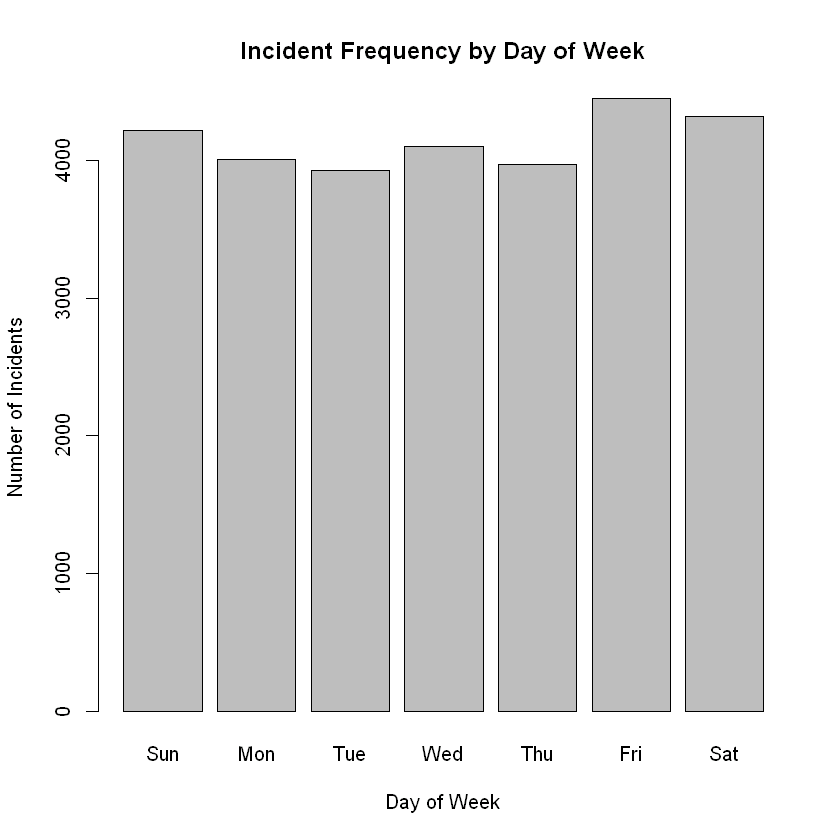

In [43]:
freqByDayOfWeek = table(sfData$DoW)
barplot(freqByDayOfWeek, xlab="Day of Week", ylab="Number of Incidents", main="Incident Frequency by Day of Week")

Incidents occur pretty evenly across all days of the week with small increases on Friday, Saturday, and Sunday compared to other days of the week.

# Get the frequency of incidents by category and show in chart

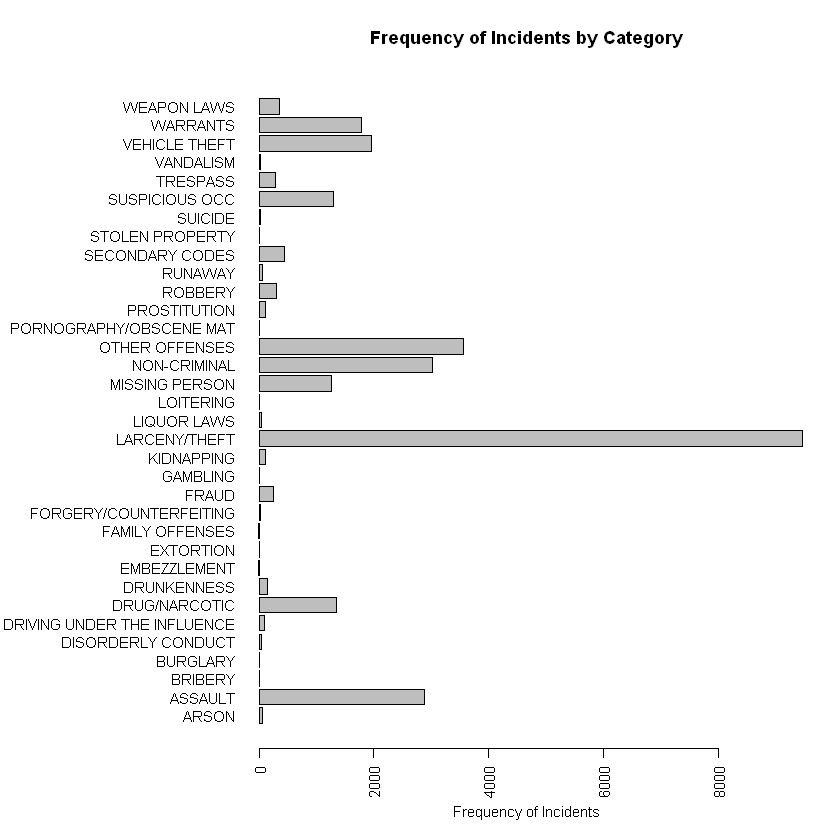

In [44]:
freqByCategory = table(sfData$Category)
par(cex=0.75, mar=c(5,14,4,2)+0.1) # adjust plot parameters to make plot fit properly in the frame
barplot(freqByCategory, horiz=T, las=2, xlab="Frequency of Incidents", 
        main="Frequency of Incidents by Category")

The most significant category of incident reported is "larceny/theft". The frequency is more than double any other category.